In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Use inline, notebook or widget accordingly
%matplotlib inline

plt.style.use("ggplot")

In [11]:
df = pd.read_csv("GR_1037 (1).csv",delimiter=";")
df

,MD,GR,DRX
0,5250.05,26.79,NaN
1,5250.20,28.01,NaN
2,5250.35,27.10,NaN
3,5250.50,25.54,NaN
4,5250.66,25.47,NaN
...,...,...,...
2621,5649.49,21.23,NaN
2622,5649.64,18.26,NaN
2623,5649.79,16.36,NaN
2624,5649.94,15.97,NaN


In [4]:
DEPT_CORE = np.array([5330.06, 5369.99, 5394.98, 5400.01, 5410.07, 5419.97, 5430.03, 5480.02, 5485.05, 5490.08, 5503.03, 5510.04, 5517.97, 5519.95, 5522.08, 5610.02])
VSH_CORE = np.array([18.4, 29.3, 21.5, 11.5, 27.4, 13.4, 11.1, 6.8, 6.6, 0.5, 0, 6.7, 0.9, 11.4, 9.3, 2.1])

In [5]:
VSH_CORE/=100

In [7]:
GR_CORE = np.interp(DEPT_CORE, df["MD"], df["GR"])

In [8]:
def vsh_larionov_tertiary(gr, gr_ma, gr_sh):
    Igr = (gr - gr_ma)/(gr_sh-gr_ma)
    return 0.083*((2**(3.7*Igr))-1)

In [9]:
gr_ma = 0
gr_sh = 200
df["Vsh"] = vsh_larionov_tertiary(df["GR"], gr_ma, gr_sh)

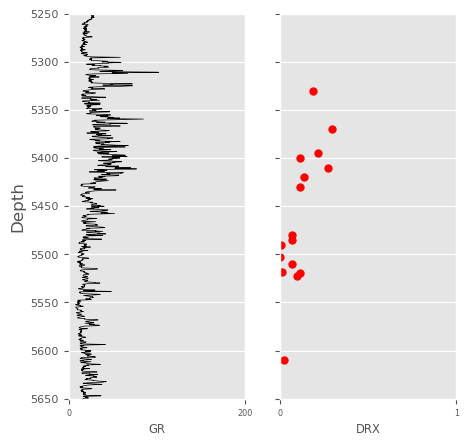

In [21]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(5,5))



ax[0].set_ylabel("Depth")
ax[0].set_ylim(5250.05,5650.10)
ax[0].set_yticks(range(5250,5650+1, 50), range(5250,5650+1, 50), fontsize=8)
ax[0].invert_yaxis()

ax[0].set_xlabel("GR", fontsize="small")
ax[0].set_xlim(0,200)
ax[0].set_xticks([0, 200], [0, 200], fontsize="xx-small")

ax[0].plot(df["GR"],df["MD"], color="black", linewidth=0.5)

ax[1].set_xlabel("DRX", fontsize="small")
ax[1].set_xlim(0, 1)
ax[1].set_xticks([0, 1], [0, 1], fontsize="xx-small")


ax[1].plot(df["DRX"]  ,df["MD"],"--", color="black", linewidth=0.5)
ax[1].plot(VSH_CORE, DEPT_CORE, "o", color="red", ms=5, label="Vsh core")

#ax[1].legend(bbox_to_anchor=(1.1, 0.5))
#ax[1].set_title("Before optimization")

fig.savefig("fig1.png", dpi=300)
plt.show()


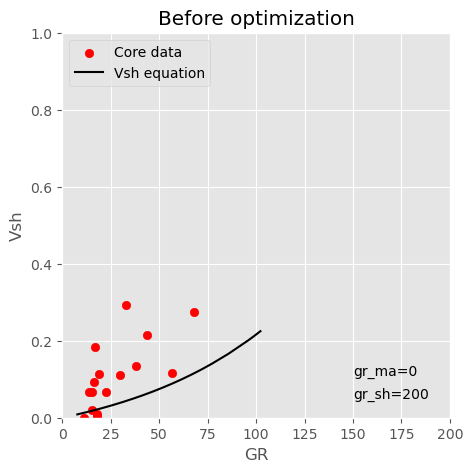

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(GR_CORE, VSH_CORE, color="red", label="Core data")
ax.plot(df["GR"].sort_values(), (vsh_larionov_tertiary(df["GR"].sort_values(), gr_ma, gr_sh)), color="black", label="Vsh equation")
ax.grid(True)
ax.legend(loc="upper left")
ax.set_title("Before optimization")

ax.set_xlabel("GR")
ax.set_ylabel("Vsh")

ax.set_xlim(0,200)
ax.set_ylim(0,1)

ax.annotate(f"gr_ma={round(gr_ma)}", (0.75, 0.11), xycoords="axes fraction")
ax.annotate(f"gr_sh={round(gr_sh)}", (0.75, 0.05), xycoords="axes fraction")


fig.savefig("fig2.png", dpi=300)
plt.show()

In [23]:
from scipy.optimize import curve_fit

In [24]:
popt, pcov = curve_fit(vsh_larionov_tertiary, GR_CORE, VSH_CORE, p0 = (gr_ma, gr_sh))


In [25]:
gr_ma = popt[0]
gr_sh = popt[1]

print(gr_ma, gr_sh)

-26.899647125119056 142.9467702612141


In [26]:
df["Vsh"] = (vsh_larionov_tertiary(df["GR"], gr_ma, gr_sh))


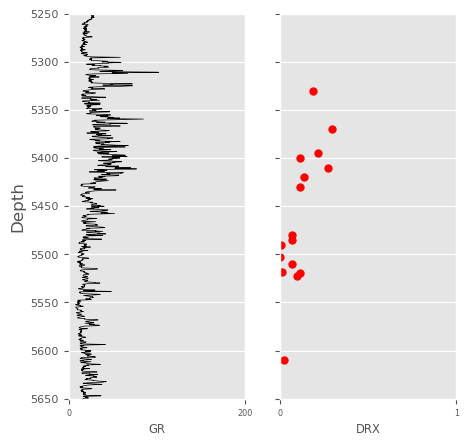

In [29]:

fig, ax = plt.subplots(1,2, sharey=True, figsize=(5,5))




ax[0].set_ylabel("Depth")
ax[0].set_ylim(5250.05,5650.10)
ax[0].set_yticks(range(5250,5650+1, 50), range(5250,5650+1, 50), fontsize=8)
ax[0].invert_yaxis()

ax[0].set_xlabel("GR", fontsize="small")
ax[0].set_xlim(0,200)
ax[0].set_xticks([0, 200], [0, 200], fontsize="xx-small")

ax[0].plot(df["GR"],df["MD"], color="black", linewidth=0.5)

ax[1].set_xlabel("DRX", fontsize="small")
ax[1].set_xlim(0, 1)
ax[1].set_xticks([0, 1], [0, 1], fontsize="xx-small")


ax[1].plot(df["DRX"], df["MD"],"--", color="black", linewidth=0.5)
ax[1].plot(VSH_CORE, DEPT_CORE, "o", color="red", ms=5, label="Vsh core")

#ax[1].legend(bbox_to_anchor=(1.1, 0.5))
#ax[1].set_title("After optimization")


fig.savefig("fig3.png", dpi=300)
plt.show()

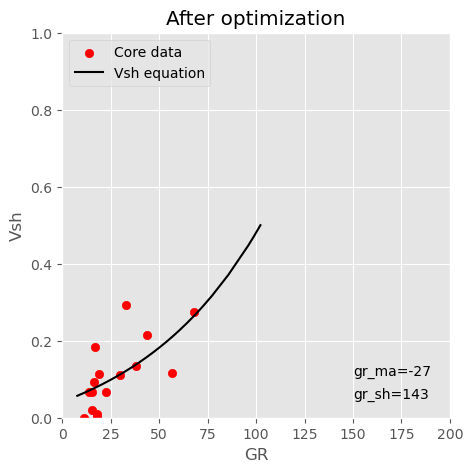

In [31]:

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(GR_CORE, VSH_CORE, label="Core data", color="red")
ax.plot(df["GR"].sort_values(), vsh_larionov_tertiary(df["GR"].sort_values(), gr_ma, gr_sh), label= "Vsh equation", color="black")
ax.grid(True)
ax.legend(loc="upper left")
ax.set_xlabel("GR")
ax.set_ylabel("Vsh")
ax.set_xlim(0,200)
ax.set_ylim(0,1)

ax.set_title("After optimization")

ax.annotate(f"gr_ma={round(gr_ma)}", (0.75, 0.11), xycoords="axes fraction")
ax.annotate(f"gr_sh={round(gr_sh)}", (0.75, 0.05), xycoords="axes fraction")


fig.savefig("fig4.png", dpi=300)
plt.show()